In [ ]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import yfinance as yf
import datetime as dt
from arch import *
from scipy.stats import pearsonr
import warnings
warnings.filterwarnings("ignore")


In [ ]:
# Q1

In [ ]:
# Downloaded csv
gldm = yf.download("GLDM", start="2020-01-01", end="2020-12-31")
speu = yf.download("SPEU", start="2020-01-01", end="2020-12-31")
btc = yf.download("BTC-USD", start = "2020-01-01", end="2020-12-31")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
btc.head(2)

,Open,High,Low,Close,Adj Close,Volume,Date,MA
Date,,,,,,,,
2020-01-01,7194.89209,7254.330566,7174.944336,7200.174316,7200.174316,18565664996,2020-01-01,NaN
2020-01-02,7202.55127,7212.155273,6935.270020,6985.470215,6985.470215,20802083465,2020-01-02,NaN


In [ ]:
#Q2

In [ ]:
# convert index to Date columns
gldm['Date'] = gldm.index
speu['Date'] = speu.index
btc['Date'] = btc.index

# convert to date time
gldm['Date'] = pd.to_datetime(gldm['Date'])
speu['Date'] = pd.to_datetime(speu['Date'])
btc['Date'] = pd.to_datetime(btc['Date'])

In [ ]:
# April to December slice
gldm_april = gldm[gldm['Date'] >= pd.to_datetime("2020-04-01")]
speu_april = speu[speu['Date'] >= pd.to_datetime("2020-04-01")]
btc_april = btc[btc['Date'] >= pd.to_datetime("2020-04-01")]

In [ ]:
# Get daily returns
gldm_april['daily_return'] = gldm_april['Adj Close'].pct_change()
speu_april['daily_return'] = speu_april['Adj Close'].pct_change()
btc_april['daily_return'] = btc_april['Adj Close'].pct_change()

AxesSubplot(0.125,0.2;0.775x0.68)
AxesSubplot(0.125,0.2;0.775x0.68)
AxesSubplot(0.125,0.2;0.775x0.68)


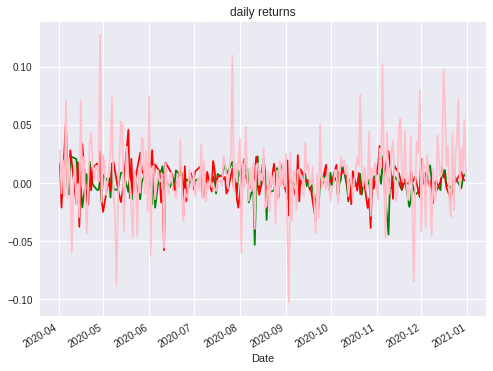

In [ ]:
#plot
print(gldm_april.daily_return.plot(figsize=(8,6),title = 'daily returns',color='green')) # GREEN - GLDM
print(speu_april.daily_return.plot(figsize=(8,6),title = 'daily returns',color='red')) # RED - SPEU
print(btc_april.daily_return.plot(figsize=(8,6),title = 'daily returns',color='pink')) # PINK- BTC

In [ ]:
# Q3

In [ ]:
# Moving Average 20days
gldm['MA'] = gldm.iloc[:,1].rolling(window=20).mean()
speu['MA'] = speu.iloc[:,1].rolling(window=20).mean()
btc['MA'] = btc.iloc[:,1].rolling(window=20).mean()

In [ ]:
# for april
gldm_april = gldm[gldm['Date'] >= pd.to_datetime("2020-04-01")]
speu_april = speu[speu['Date'] >= pd.to_datetime("2020-04-01")]
btc_april = btc[btc['Date'] >= pd.to_datetime("2020-04-01")]

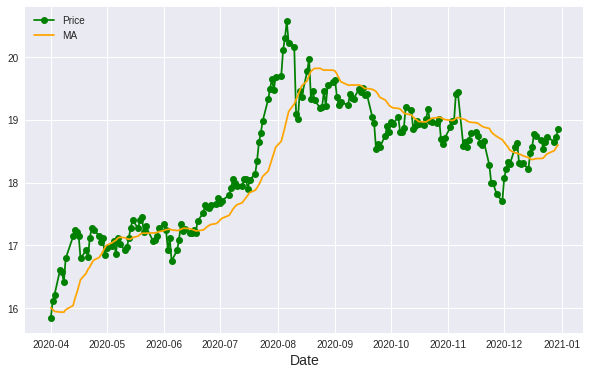

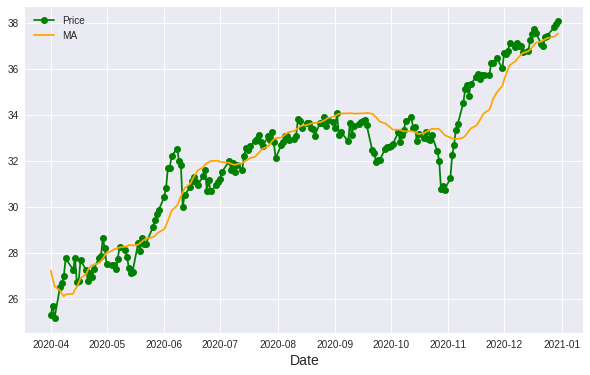

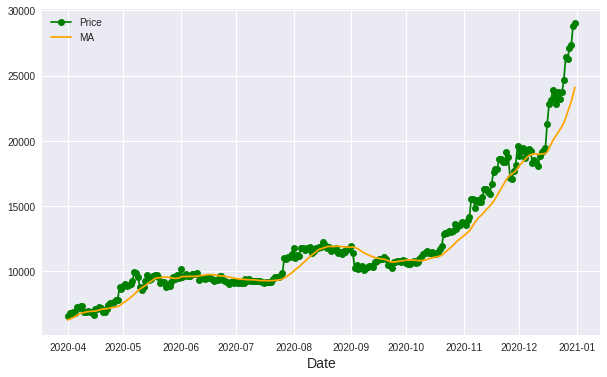

In [ ]:
# Plotting the MA and price graphs

#GLDM
fig,ax = plt.subplots(figsize=(10,6))
ax.plot(gldm_april.Date, gldm_april['Adj Close'], color="green", marker="o",label = 'Price')
ax.set_xlabel("Date",fontsize=14)
ax.legend(loc = 'upper left')
ax.plot(gldm_april.Date, gldm_april.MA,color="orange",marker="", label = 'MA')
ax.legend(loc = 'upper left')
plt.show()

#SPEU
fig,ax = plt.subplots(figsize=(10,6))
ax.plot(speu_april.Date, speu_april['Adj Close'], color="green", marker="o",label = 'Price')
ax.set_xlabel("Date",fontsize=14)
ax.legend(loc = 'upper left')
ax.plot(speu_april.Date, speu_april.MA,color="orange",marker="", label = 'MA')
ax.legend(loc = 'upper left')
plt.show()


#BTC
fig,ax = plt.subplots(figsize=(10,6))
ax.plot(btc_april.Date, btc_april['Adj Close'], color="green", marker="o",label = 'Price')
ax.set_xlabel("Date",fontsize=14)
ax.legend(loc = 'upper left')
ax.plot(btc_april.Date, btc_april.MA,color="orange",marker="", label = 'MA')
ax.legend(loc = 'upper left')
plt.show()

In [ ]:
# Q4

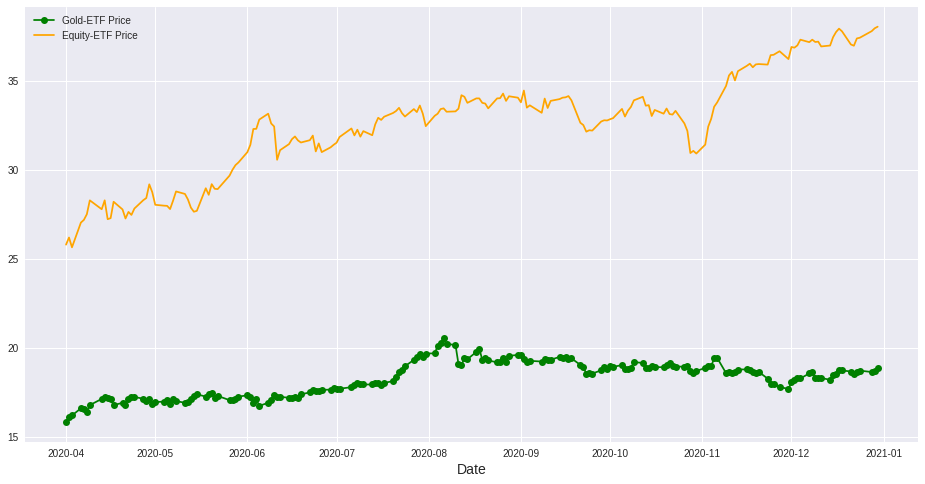

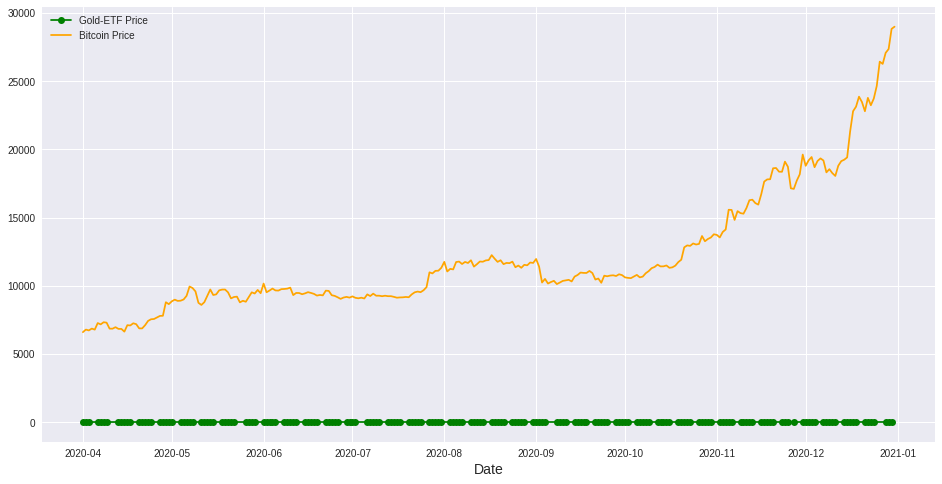

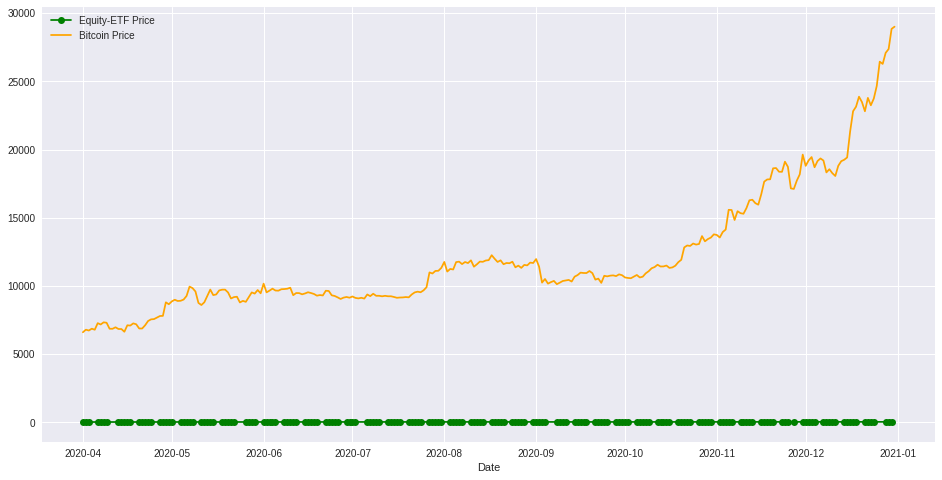

In [ ]:
# Gold and Equity ETF
fig,ax = plt.subplots(figsize=(16,8))
ax.plot(gldm_april.Date, gldm_april['Close'], color="green", marker="o",label = 'Gold-ETF Price')
ax.legend(loc = 'upper left')
ax.set_xlabel("Date",fontsize=14)
ax.plot(speu_april.Date, speu_april['Close'],color="orange",marker="", label = 'Equity-ETF Price')
ax.legend(loc = 'upper left')
plt.show()

# Gold and Bitcoin ETF
fig,ax = plt.subplots(figsize=(16,8))
ax.plot(gldm_april.Date, gldm_april['Close'], color="green", marker="o",label = 'Gold-ETF Price')
ax.legend(loc = 'upper left')
ax.set_xlabel("Date",fontsize=14)
ax.plot(btc_april.Date, btc_april['Close'],color="orange",marker="", label = 'Bitcoin Price')
ax.legend(loc = 'upper left')
plt.show()

# SPEU and Bitcoin ETF
fig,ax = plt.subplots(figsize=(16,8))
ax.plot(speu_april.Date, speu_april['Close'], color="green", marker="o",label = 'Equity-ETF Price')
ax.legend(loc = 'upper left')
ax.set_xlabel("Date")
ax.plot(btc_april.Date, btc_april['Close'],color="orange",marker="", label = 'Bitcoin Price')
ax.legend(loc = 'upper left')
plt.show()

In [ ]:
# Q5

Iteration:      1,   Func. Count:      6,   Neg. LLF: -187.5250558724089
Iteration:      2,   Func. Count:     18,   Neg. LLF: -187.5424263332274
Iteration:      3,   Func. Count:     32,   Neg. LLF: -187.54243290544187
Iteration:      4,   Func. Count:     41,   Neg. LLF: -187.5591228084017
Iteration:      5,   Func. Count:     54,   Neg. LLF: -187.5785028898556
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -187.57850341117
            Iterations: 9
            Function evaluations: 54
            Gradient evaluations: 5
Iteration:      1,   Func. Count:      6,   Neg. LLF: -182.66935798306974
Iteration:      2,   Func. Count:     18,   Neg. LLF: -182.6796419701413
Iteration:      3,   Func. Count:     30,   Neg. LLF: -182.67964934293602
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -182.67964957209475
            Iterations: 4
            Function evaluations: 37
            Gradient evaluations

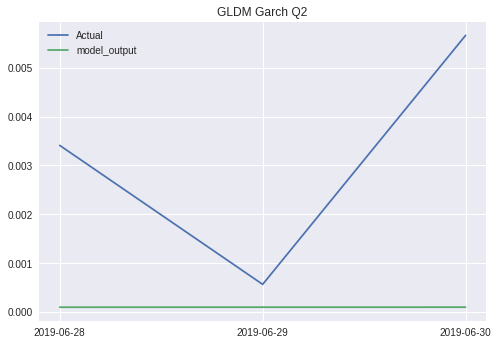

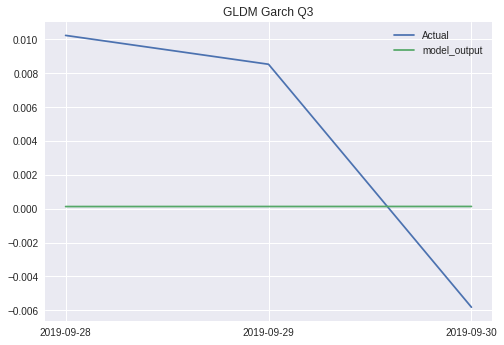

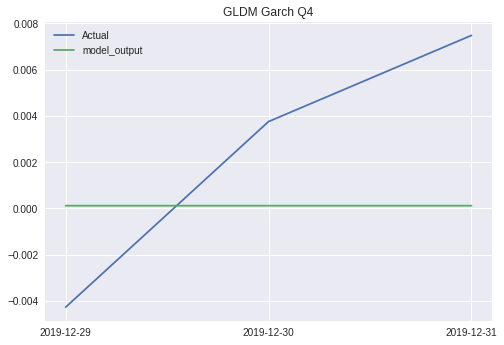

In [ ]:
# Building GARCH model for gldm
gldm_april['daily_ret'] = gldm_april['Close'].pct_change()
gldm_q2 = gldm_april['daily_ret'][(gldm_april['Date']<=pd.to_datetime('2020-06-30')) & (gldm_april['Date']>=pd.to_datetime('2020-04-01'))]
gldm_q3 = gldm_april['daily_ret'][(gldm_april['Date']<=pd.to_datetime('2020-09-30')) & (gldm_april['Date']>=pd.to_datetime('2020-07-01'))]
gldm_q4 = gldm_april['daily_ret'][(gldm_april['Date']<=pd.to_datetime('2020-12-31')) & (gldm_april['Date']>=pd.to_datetime('2020-10-01'))]

gldm_q2.dropna(inplace=True)
gldm_q3.dropna(inplace=True)
gldm_q4.dropna(inplace=True)

n_test = 3
q2_range = ('2019-06-28', '2019-06-29', '2019-06-30')
q3_range = ('2019-09-28', '2019-09-29', '2019-09-30')
q4_range = ('2019-12-29', '2019-12-30', '2019-12-31')

train1, test1 = gldm_q2[:-n_test], gldm_q2[-n_test:]
train2, test2 = gldm_q3[:-n_test], gldm_q3[-n_test:]
train3, test3 = gldm_q4[:-n_test], gldm_q4[-n_test:]

model_q2 = arch_model(train1, vol='GARCH', p=1, q=1)
model_q3 = arch_model(train2, vol='GARCH', p=1, q=1)
model_q4 = arch_model(train3, vol='GARCH', p=1, q=1)

model2_fit = model_q2.fit()
model3_fit = model_q3.fit()
model4_fit = model_q4.fit()

# forecast the test set
yhat2 = model2_fit.forecast(horizon=n_test)
yhat3 = model3_fit.forecast(horizon=n_test)
yhat4 = model4_fit.forecast(horizon=n_test)

# plot the actual variance
var = test1
plt.plot(q2_range,var[-n_test:].values, label='Actual')
plt.plot(q2_range,(yhat2.variance.values[-1, :]), label='model_output')
plt.legend()
plt.title("GLDM Garch Q2")
plt.show()

var = test2
plt.plot(q3_range,var[-n_test:].values, label='Actual')
plt.plot(q3_range,(yhat3.variance.values[-1, :]), label='model_output')
plt.legend()
plt.title("GLDM Garch Q3")
plt.show()

var = test3
plt.plot(q4_range,var[-n_test:].values, label='Actual')
plt.plot(q4_range,(yhat4.variance.values[-1, :]), label='model_output')
plt.legend()
plt.title("GLDM Garch Q4")
plt.show()

In [ ]:
# E-GARCH Model
model_q2 = arch_model(train1,vol='EGARCH', p=1, q=1)
model_q3 = arch_model(train2,vol='EGARCH', p=1, q=1)
model_q4 = arch_model(train3,vol='EGARCH', p=1, q=1)

model2_fit = model_q2.fit()
model3_fit = model_q3.fit()
model4_fit = model_q4.fit()

print(model2_fit.summary())
print(model3_fit.summary())
print(model4_fit.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: -187.49551888938157
Iteration:      2,   Func. Count:     18,   Neg. LLF: -187.5087525182075
Iteration:      3,   Func. Count:     27,   Neg. LLF: -187.90170527212112
Iteration:      4,   Func. Count:     35,   Neg. LLF: -187.95268190356714
Iteration:      5,   Func. Count:     42,   Neg. LLF: -188.0765906728862
Iteration:      6,   Func. Count:     49,   Neg. LLF: -188.15563966078147
Iteration:      7,   Func. Count:     56,   Neg. LLF: -188.17389572984976
Iteration:      8,   Func. Count:     63,   Neg. LLF: -188.27015811684913
Iteration:      9,   Func. Count:     70,   Neg. LLF: -188.40217461504957
Iteration:     10,   Func. Count:     77,   Neg. LLF: -188.57570022904966
Iteration:     11,   Func. Count:     83,   Neg. LLF: -190.19945775773334
Iteration:     12,   Func. Count:     90,   Neg. LLF: -190.34083411545595
Iteration:     13,   Func. Count:     97,   Neg. LLF: -190.46260794084262
Iteration:     14,   Func. Count:    104

In [ ]:
# Q6,Q7

GLDM


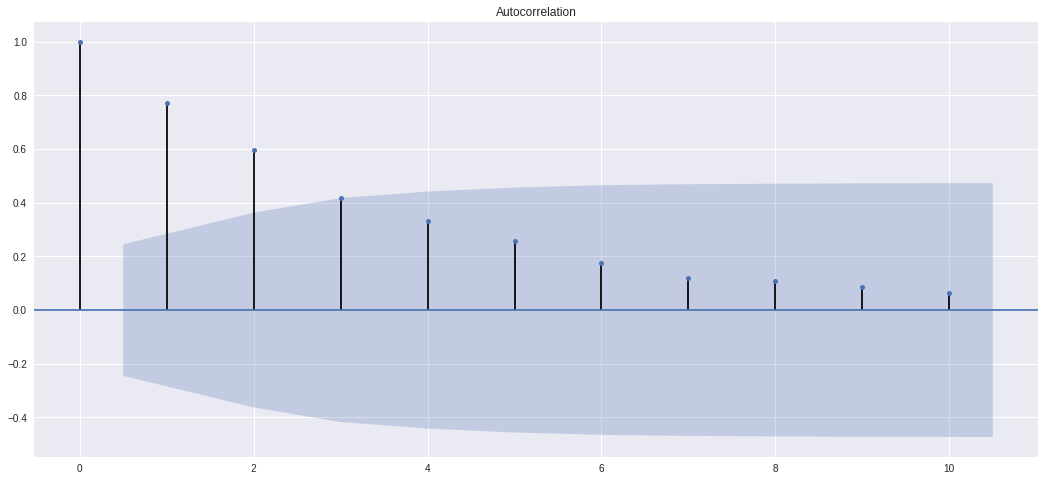

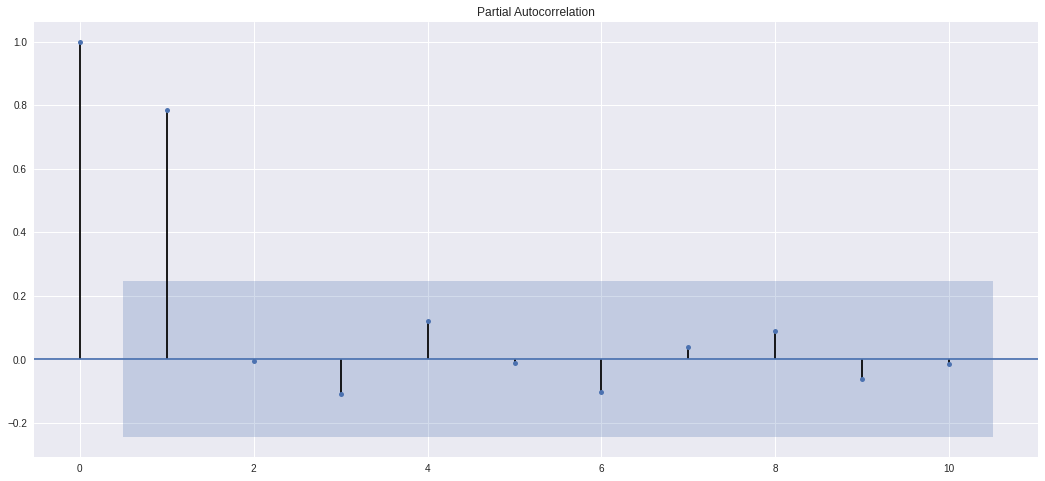

SPEU


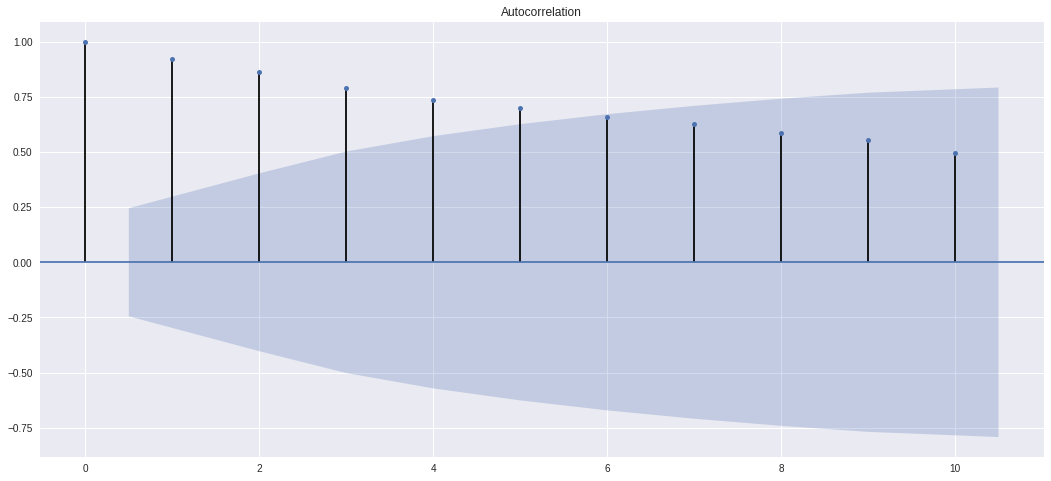

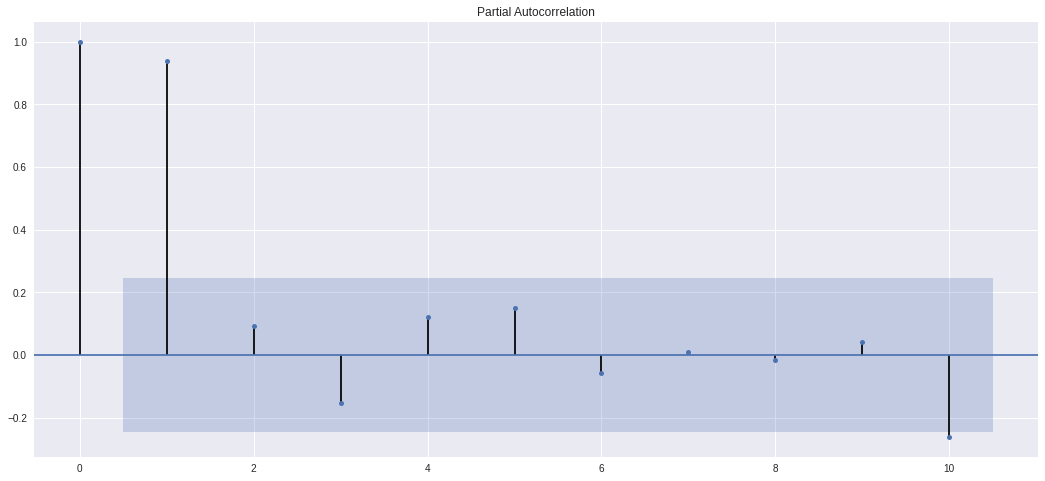

BTC


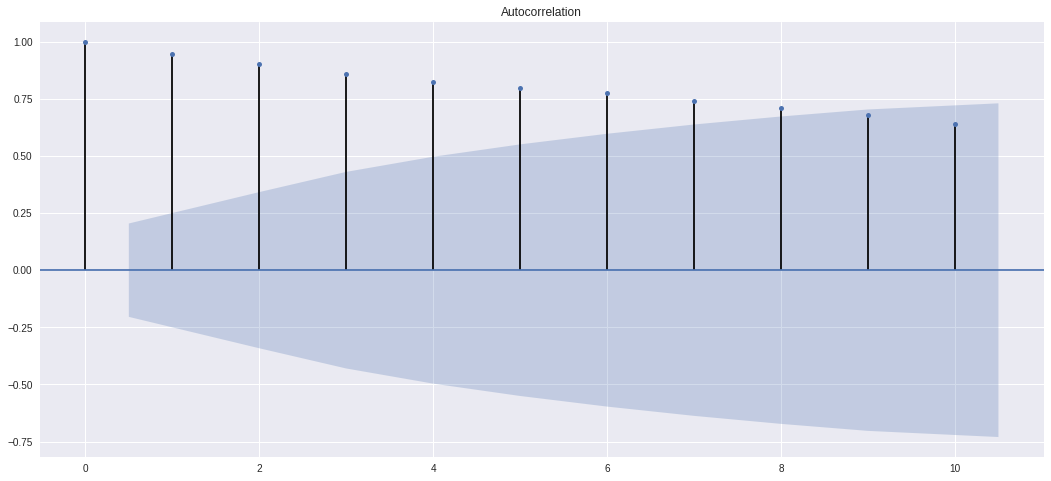

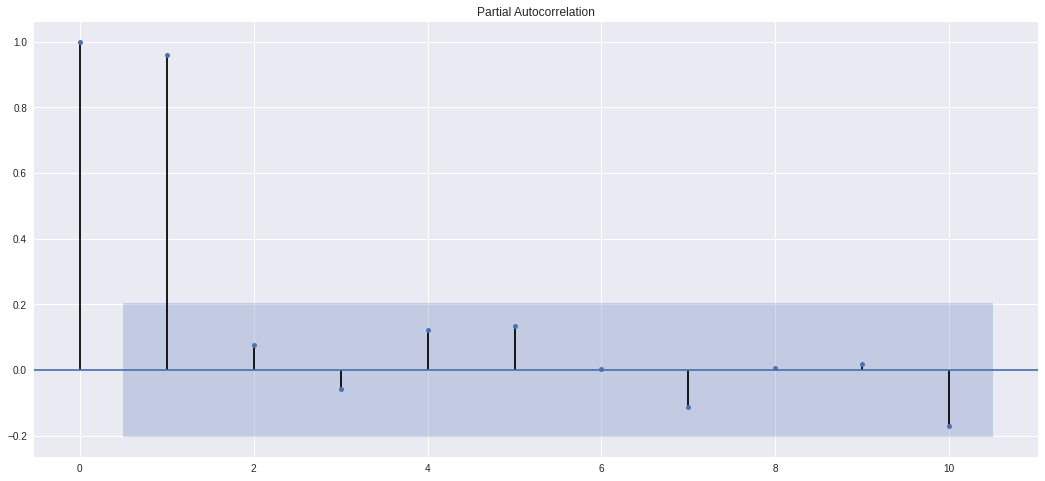

In [ ]:
import statsmodels.api as sm

#For 2nd quater

print('GLDM')
sm.graphics.tsa.plot_acf(gldm['Adj Close']["2020-04-01":"2020-7-01"], lags=10)
sm.graphics.tsa.plot_pacf(gldm['Adj Close']["2020-04-01":"2020-7-01"], lags=10)
plt.show()

print('SPEU')
sm.graphics.tsa.plot_acf(speu['Adj Close']["2020-04-01":"2020-7-01"], lags=10)
sm.graphics.tsa.plot_pacf(speu['Adj Close']["2020-04-01":"2020-7-01"], lags=10)
plt.show()

print('BTC')
sm.graphics.tsa.plot_acf(btc['Adj Close']["2020-04-01":"2020-7-01"], lags=10)
sm.graphics.tsa.plot_pacf(btc['Adj Close']["2020-04-01":"2020-7-01"], lags=10)
plt.show()